In [1]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

In [2]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X,y = load_svmlight_file(f=BytesIO(r.content), n_features=13)#y读取了数据样本标签值，x读取了数据中的属性值
X = X.toarray()

In [3]:
import numpy

# preprocess(预处理)
n_samples, n_features = X.shape#shape函数是查看array有多少行，多少列
X = numpy.column_stack((numpy.ones((n_samples, 1)),X))#numpy.column_stack作用是把两个array按列合并
y = y.reshape((-1, 1))#reshape（r，c）对array重新排列成r行，c列。-1代表未给定，不用考虑

In [4]:
# divide the train dataset and validation dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [8]:
#使用训练集数据集求出w的值
X_T=X_train.transpose()
X_TX=numpy.dot(X_T,X_train)
X_TX_inv=numpy.linalg.inv(X_TX)#矩阵求逆
X_Ty=numpy.dot(X_T,y_train)
w=numpy.dot(X_TX_inv,X_Ty)

loss=0.5*numpy.square(numpy.linalg.norm(y-numpy.dot(X,w)))/y.shape[0]
print('loss:{0}'.format(loss))

loss_train=0.5*numpy.square(numpy.linalg.norm(y_train-numpy.dot(X_train,w)))/y.shape[0]
print('loss_train:{0}'.format(loss_train))

loss_val=0.5*numpy.square(numpy.linalg.norm(y_val-numpy.dot(X_val,w)))/y.shape[0]
print('loss_val:{0}'.format(loss_val))

loss:11.160582012461669
loss_train:7.341086740435234
loss_val:3.8194952720264337


In [14]:
penalty_factor = 0.5  # 系数，根据损失函数，系数为0.5
learning_rate = 0.0005
max_epoch = 30000

losses_train = []
losses_val = []

In [15]:
import random
# select different initializing method
w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
# w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [16]:
row,col=X_train.shape
for epoch in range(max_epoch):
    random_num=random.randint(0,row-1)#生成一个随机数
    X_random=X_train[random_num]#随机选择一个样本向量
    y_random=y_train[random_num]
    X_random=numpy.expand_dims(X_random,axis=0)#numpy的array增加维度
    diff = y_random-numpy.dot(X_random, w)#dot对于一维向量，是点积、对于二维数组，是矩阵乘法。这里将X_train（379,14）与w(14,1)进行矩阵相乘
    G = -numpy.dot(X_random.transpose(), diff)  # transpose（）转置为X_train.transpose()=(14,379)
    G = -G
    w += learning_rate * G  # update the parametersX

    Y_predict = numpy.dot(X_train, w)  # predict under the train set
    loss_train=0.5*numpy.square(numpy.linalg.norm(y_train-numpy.dot(X_train,w)))# calculate the absolute differences
    losses_train.append(loss_train)

    Y_predict = numpy.dot(X_val, w)  # predict under the validation set
    loss_val = 0.5*numpy.square(numpy.linalg.norm(y_val-numpy.dot(X_val,w)))  # calculate the absolute differences
    losses_val.append(loss_val)

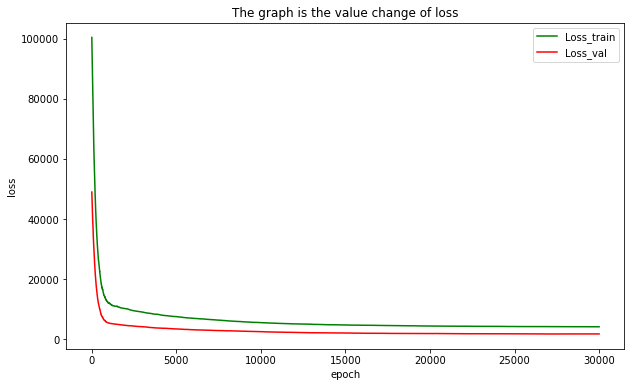

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses_train, "-", color="g", label="Loss_train")
plt.plot(losses_val, "-", color="r", label="Loss_val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph is the value change of loss")